In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
# Testing images
X_test.shape

(10000, 32, 32, 3)

In [4]:
# Training images
X_train.shape

(50000, 32, 32, 3)

In [6]:
from tensorflow.keras.utils import to_categorical

# Normalize to a range of 0 to 1
x_train = X_train.astype('float32') / 255.0
x_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Done!")

Done!


In [14]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 213s 339ms/step - loss: 2.0679 - accuracy: 0.2129 - val_loss: 1.7519 - val_accuracy: 0.3505
Epoch 2/20
625/625 [==============================] - 184s 294ms/step - loss: 1.7154 - accuracy: 0.3592 - val_loss: 1.6610 - val_accuracy: 0.4014
Epoch 3/20
625/625 [==============================] - 186s 297ms/step - loss: 1.5485 - accuracy: 0.4322 - val_loss: 1.3895 - val_accuracy: 0.4967
Epoch 4/20
625/625 [==============================] - 182s 291ms/step - loss: 1.4292 - accuracy: 0.4787 - val_loss: 1.3232 - val_accuracy: 0.5204
Epoch 5/20
625/625 [==============================] - 184s 294ms/step - loss: 1.3358 - accuracy: 0.5259 - val_loss: 1.2262 - val_accuracy: 0.5676
Epoch 6/20
625/625 [==============================] - 219s 350ms/step - loss: 1.2475 - accuracy: 0.5534 - val_loss: 1.2055 - val_accuracy: 0.5814
Epoch 7/20
625/625 [==============================] - 230s 368ms/step - loss: 1.1737 - accuracy: 0.5829 - val_loss: 1.1103 -

In [15]:
# Evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.3f}')

313/313 [==============================] - 13s 39ms/step - loss: 0.8947 - accuracy: 0.7131
Test accuracy: 0.713


In [16]:
predictions = model.predict(x_test)

# Example

predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test, axis=1)

313/313 [==============================] - 36s 41ms/step


In [22]:
actual_classes[:15]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=int64)

In [23]:
predicted_classes[:15]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 2, 7, 9], dtype=int64)

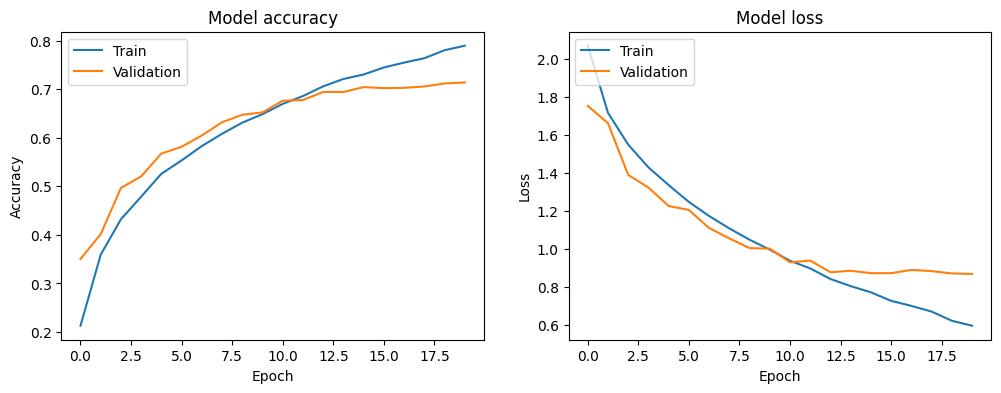

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()